In [ ]:
# General imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
import altair as alt

c:\Users\bapti\projet_NLP\env_projet_NLP\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [42]:
df= pd.read_csv("../Data_csv/data_preprocessed.csv")[["Name of the document", "Institution", "text_processed", "theme"]]

In [3]:
def count_words(texts, voc = None):
    """Vectorize text : return count of each word in the text snippets

    Parameters
    ----------
    texts : list of str
        The texts
    Returns
    -------
    vocabulary : dict
        A dictionary that points to an index in counts for each word.
    counts : ndarray, shape (n_samples, n_features)
        The counts of each word in each text.
    """
    n_samples = len(texts)
    if voc == None:
        words = set()
        for text in texts:
            words = words.union(set(text)) # list of all words
        n_features = len(words) # number of different words
        vocabulary = dict(zip(words, range(n_features))) # vocab[wd] = index ; indexisation
    else:
        vocabulary = voc
        n_features = len(voc)
    counts = np.zeros((n_samples, n_features))
    for k, text in enumerate(texts): # enumeration a k for a text[k]
        for w in text:
            if w in vocabulary:
                counts[k][vocabulary[w]] += 1.
    return vocabulary, counts

In [43]:
# Create and fit the vectorizer to the training data
dates = set([str(i) for i in range(1990, 2025)])
custom_stop_words = ['ai', 'data', 'maxwidth', 'px', 'maxheight', 'img', 'src', 'https', 'com', 'www', 'http', 'jpg', 'png', 'gif', 'jpeg', 'pdf', 'html', 'grid','body', ':root', '\n', 'padding',',button','margintop', 'px', 'margin', 'border', 'width', 'height', 'color', 'font', 'size', 'background', 'position', 'left', 'right', 'top', 'bottom', 'display', 'flex', 'align', 'justify', 'content', 'center', 'float', 'clear', 'overflow', 'hidden', 'zindex', 'cursor', 'pointer', 'hover', 'active', 'focus', 'transition', 'transform', 'rotate', 'scale', 'translate', 'opacity', 'box', 'shadow', 'outline', 'none', 'block', 'inline', 'inlineblock', 'relative', 'absolute', 'fixed', 'static', 'sticky', 'visible', 'hidden']
custom_stop_words += dates
vectorizer = CountVectorizer(stop_words=custom_stop_words,token_pattern=r"(?u)\b\w{2,}\b")
Bow = vectorizer.fit_transform(df['text_processed'])
bow_a = Bow.toarray()
voc_a = vectorizer.vocabulary_
print(bow_a.shape)

c:\Users\bapti\projet_NLP\env_projet_NLP\Lib\site-packages\sklearn\feature_extraction\text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['button', 'root'] not in stop_words.
  warnings.warn(


(457, 139687)


In [44]:
frequency = bow_a.sum(axis = 0)
top_words = np.argsort(frequency)[::-1]

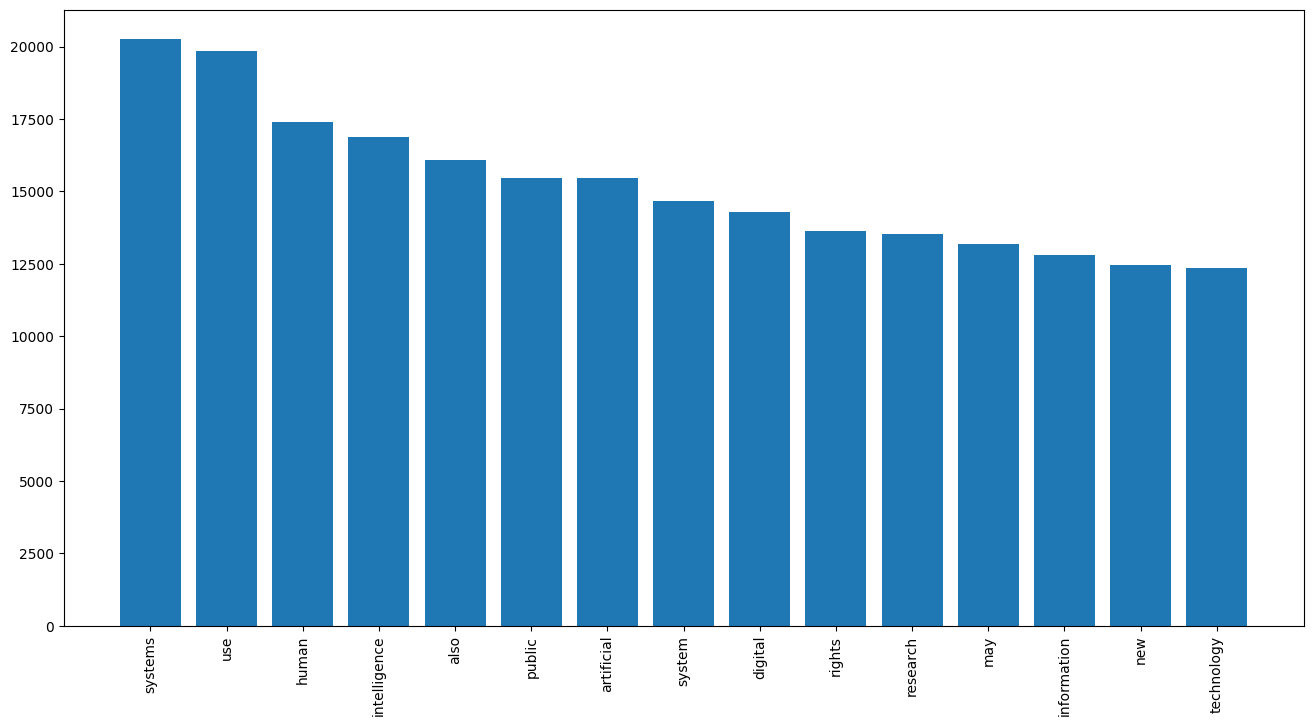

In [45]:
rev_voc = {i: w for w, i in voc_a.items()}
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(15), frequency[top_words[:15]])
ax.set_xticks(range(15))
ax.set_xticklabels([rev_voc[i] for i in top_words[:15]], rotation='vertical')
plt.show()

In [46]:
def euclidean(u, v):
    return np.linalg.norm(u-v)

def length_norm(u):
    return u / np.sqrt(u.dot(u))

def cosine(u, v):
    return 1.0 - length_norm(u).dot(length_norm(v))



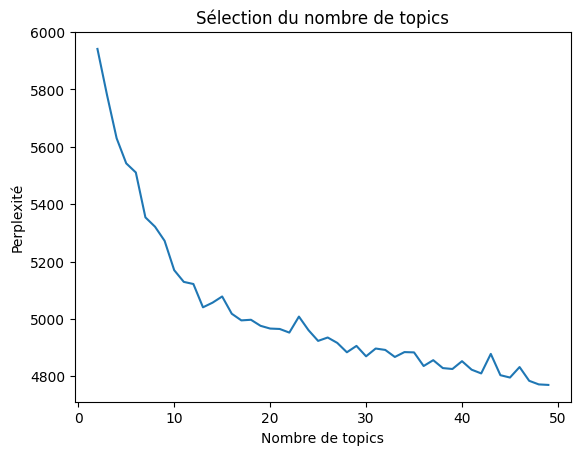

In [ ]:
"""
perplexities = []
for k in range(2, 50):  # Tester différents nombres de topics
    lda_model = LatentDirichletAllocation(n_components=k, random_state=42)
    lda_model.fit(bow_a)  # bow est votre matrice de document-terme
    perplexities.append(lda_model.perplexity(bow_a))

# Tracer la perplexité
plt.plot(range(2, 50), perplexities)
plt.xlabel("Nombre de topics")
plt.ylabel("Perplexité")
plt.title("Sélection du nombre de topics")
plt.show()
"""

nombre de topics intéressants: 12

In [67]:
# Reversing the vocabulary to retrieve words from indexes, allowing to find the most important words for each topic
rev_voc_th = {i: w for w, i in voc_a.items()}

In [68]:
n_topics = 12
lda = LatentDirichletAllocation(n_components = n_topics)
lda_topics_th = lda.fit_transform(bow_a)

In [69]:
def most_important_words(n, reverse_vocabulary, topic_model):
    out = []
    for i, topic in enumerate(topic_model.components_):
        out.append([reverse_vocabulary[j] for j in topic.argsort()[:-n-1:-1]])
    return out

In [70]:
words = most_important_words(15, rev_voc_th, lda)
for i, topic in enumerate(words[:15]):
    print("Topic ", i+1, " : ", topic)

Topic  1  :  ['health', 'care', 'use', 'technologies', 'technology', 'healthcare', 'may', 'patient', 'medical', 'intelligence', 'patients', 'digital', 'artificial', 'clinical', 'liability']
Topic  2  :  ['intelligence', 'index', 'report', 'artificial', 'number', 'figure', 'chapter', 'papers', 'learning', 'technical', 'language', 'global', 'source', 'research', 'publications']
Topic  3  :  ['eu', 'public', 'systems', 'european', 'artificial', 'use', 'intelligence', 'digital', 'commission', 'also', 'development', 'technologies', 'legal', 'human', 'protection']
Topic  4  :  ['tion', 'ts', 'al', 'wha', 'ed', 'es', 'ethics', 'ation', 'pr', 'also', 'resear', 'tions', 'ch', 'ted', 'tha']
Topic  5  :  ['learning', 'machine', 'systems', 'ethics', 'research', 'human', 'ethical', 'technology', 'intelligence', 'new', 'work', 'use', 'artificial', 'social', 'may']
Topic  6  :  ['eu', 'cdn', 'effect', 'de', 'segoeui', 'regulation', 'brussels', 'net', 'facto', 'office', 'act', 'market', 'files', 'like

In [71]:
# Pour chaque document, trouvez l'index du topic dominant
dominant_topics = lda_topics_th.argmax(axis=1)

In [86]:
# Liste des titres des thèmes
theme_titles = [
    "Technologies de Santé et Intelligence Artificielle Médicale",
    "Rapports, Publications et Indices de l'IA",
    "Régulations Européennes et Protection Numérique",
    "Éthique et Terminologies Associées",
    "Éthique et Apprentissage Automatique dans les Sciences Sociales",
    "Régulations Européennes et Marché Numérique",
    "Stratégies Nationales et Développement Numérique",
    "Prise de Décision et Biais Algorithmiques",
    "Formation, Compétences et Emploi dans le Contexte de l'OCDE",
    "Standards et Applications Basées sur l’IA",
    "Médias et Régulations Européennes en IA",
    "Droits Humains, Confidentialité et Protection des Données"
]


# Mappez les indices des topics aux titres
data_th = pd.DataFrame({
    'x': docs_tsne_th[:, 0],
    'y': docs_tsne_th[:, 1],
    'theme': [theme_titles[t] for t in dominant_topics],  # Remplace les indices par les titres
    'title': df["Name of the document"]
})

# Visualisation avec Altair
alt.data_transformers.disable_max_rows()
alt.Chart(data_th).mark_circle(size=200).encode(
    x="x", 
    y="y", 
    color=alt.Color('theme:N', scale=alt.Scale(scheme='category20'), sort=theme_titles), 
    tooltip=['title']  # Affiche les titres dans le tooltip
).interactive().properties(
    width=500,
    height=500
).configure_legend(
    labelLimit=400
)


alt.Chart(...)

In [72]:
docs_tsne_th = TSNE(n_components=2, learning_rate='auto',
                  init='pca', metric='cosine', perplexity=50.0).fit_transform(lda_topics_th)
print(docs_tsne_th.shape)

data_th = pd.DataFrame({'x': docs_tsne_th[:,0],
                        'y': docs_tsne_th[:,1],
                        #'theme': df['theme']})
                        'theme': dominant_topics })

alt.data_transformers.disable_max_rows()
alt.Chart(data_th[:]).mark_circle(size=200).encode(
    x="x", 
    y="y", 
    color=alt.Color('theme:N', scale=alt.Scale(scheme='category20')),
    tooltip=['theme']
).interactive().properties(
    width=500,
    height=500
)

(457, 2)


alt.Chart(...)